In [8]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
df_warszawa = pd.read_csv('warszawa.txt',header=None,delim_whitespace=True)
df_sztokholm = pd.read_csv('sztokholm.txt',header=None,delim_whitespace=True)


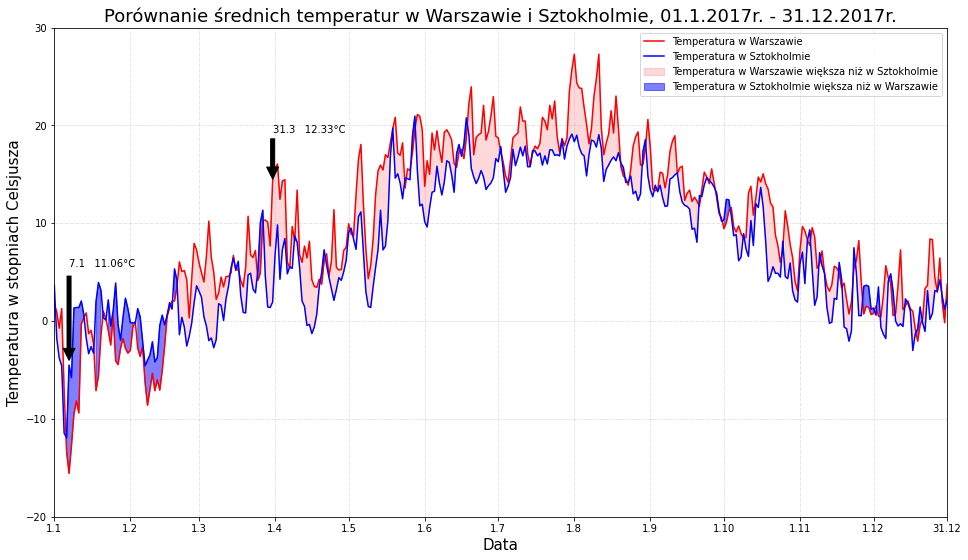

In [9]:
warszawa_temp=[]
sztokholm_temp=[]
data=[]

for i in range(365):
    warszawa_temp.append(df_warszawa[3][i])
    sztokholm_temp.append(df_sztokholm[3][i])
    a = str(df_warszawa[1][i])+"."+str(df_warszawa[0][i])
    data.append(a)
    a = " "
     
def convert(lista):
    lista1=[]
    for i in range(len(lista)):
        a = (float(lista[i])-32)/1.8
        lista1.append(a)
    return lista1    
        
warszawa_temp=convert(warszawa_temp)
sztokholm_temp=convert(sztokholm_temp)

warszawa_temp=np.array(warszawa_temp)
sztokholm_temp=np.array(sztokholm_temp)

lista_pomocnicza1=[]
for i in range(len(warszawa_temp)):
    lista_pomocnicza1.append(round(warszawa_temp[i]-sztokholm_temp[i],2))
    
maks = max(lista_pomocnicza1)
index1 = lista_pomocnicza1.index(maks)
x1 = data[index1] 
y1 = warszawa_temp[index1]
napis1 = str(data[index1] + "   " + str(maks)+str("°C"))

lista_pomocnicza2=[]
for i in range(len(warszawa_temp)):
    lista_pomocnicza2.append(round(sztokholm_temp[i]-warszawa_temp[i],2))
    
mini = max(lista_pomocnicza2)
index2 = lista_pomocnicza2.index(mini)
x2 = data[index2] 
y2 = sztokholm_temp[index2]
napis2 = str(data[index2] + "   " + str(mini)+str("°C"))

fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot()
plt.plot(data,warszawa_temp,color='red',label="Temperatura w Warszawie")
plt.plot(data,sztokholm_temp,color='blue',label="Temperatura w Sztokholmie")
ax.fill_between(data,warszawa_temp,sztokholm_temp,where=(warszawa_temp >= sztokholm_temp),color='red',alpha=0.15,label="Temperatura w Warszawie większa niż w Sztokholmie")
ax.fill_between(data,warszawa_temp,sztokholm_temp,where=(sztokholm_temp > warszawa_temp),color='blue',alpha=0.5,label="Temperatura w Sztokholmie większa niż w Warszawie")
ax.annotate(napis1,xy=(x1,y1),xytext=(x1,y1+5),arrowprops=dict(shrink=0.05,facecolor='black'))
ax.annotate(napis2,xy=(x2,y2),xytext=(x2,y2+10),arrowprops=dict(shrink=0.05,facecolor='black'))
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.4)
ax.set_ylim(-20,30)
ax.set_xlim(1.1,31.12)
ax.set_xticks(["1.1","1.2","1.3","1.4","1.5","1.6","1.7","1.8","1.9","1.10","1.11","1.12","31.12"])
ax.set_title("Porównanie średnich temperatur w Warszawie i Sztokholmie, 01.1.2017r. - 31.12.2017r.",size=18)
ax.set_xlabel("Data",size=15)
ax.set_ylabel("Temperatura w stopniach Celsjusza",size=15)
ax.legend()
plt.savefig("07_str_277094.pdf")